In [102]:
!pip install qutip

In [103]:
# setup the matplotlib graphics library and configure it to show figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [104]:
# make qutip available in the rest of the notebook
from qutip import *
from numpy import *
from scipy import *

In [105]:
wc = 1.0  * 2 * pi  # cavity frequency
wa = 1.0  * 2 * pi  # atom frequency

N = 15              # number of cavity fock states
use_rwa = False

In [106]:
#operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus
sz1 = tensor(qeye(N), sigmaz())  #operator sigma-z modifikasi
sx1 = tensor(qeye(N), sigmax())  #operator sigma-x modifikasi

na = sm.dag() * sm  # atom
nc = a.dag() * a    # cavity

In [107]:
# Hamiltonian
Ho = wc * a.dag() * a     # osilator
Hq = 0.5 * wa* (0*sx1 + 10*sz1)      #qubit
   
# Hamiltonian Interaksi
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

In [108]:
g_vec = np.linspace(0, 5.0, 101) * 2 * pi # coupling strength vector

psi_list = []

for g in g_vec:

    H = Ho + Hq + g * H1

    # find the groundstate and its energy
    gnd_energy, gnd_state = H.groundstate()
    
    # store the ground state
    psi_list.append(gnd_state)

In [109]:
na_expt = expect(na, psi_list) # qubit  occupation probability
nc_expt = expect(nc, psi_list) # cavity occupation probability

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  """Entry point for launching an IPython kernel.


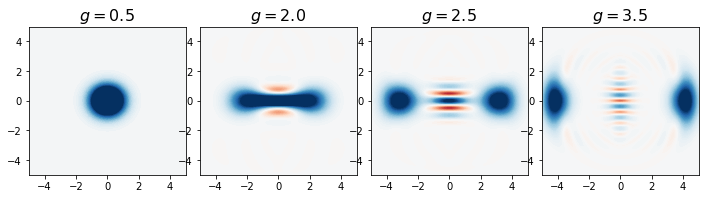

In [110]:
g_idx = where([g_vec == 2*pi*g for g in [0.5, 2.0, 2.5, 3.5]])[1]
psi_sublist = []
for s in g_idx :
  psi_sublist.append(psi_list[s])


xvec = np.linspace(-5,5,200)

fig_grid = (2, len(psi_sublist)*2)
fig = plt.figure(figsize=(3*len(psi_sublist),6))

for idx, psi in enumerate(psi_sublist):
    rho_cavity = ptrace(psi, 0)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$g = %.1f$" % (g_vec[g_idx][idx]/(2*pi)), fontsize=16)


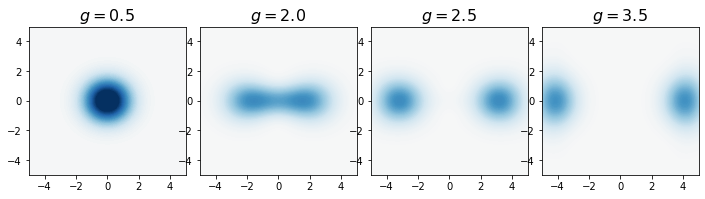

In [111]:
xvec = np.linspace(-5,5,200)

fig_grid = (2, len(psi_sublist)*2)
fig = plt.figure(figsize=(3*len(psi_sublist),6))


for idx, psi in enumerate(psi_sublist):
    rho_cavity = ptrace(psi, 0)
    Q = qfunc(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    ax.contourf(xvec, xvec, Q, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$g = %.1f$" % (g_vec[g_idx][idx]/(2*pi)), fontsize=16)
